<a href="https://colab.research.google.com/github/MudassirABBASSi/Hand-writing-Prediction/blob/main/Hand_Writing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:

# Check the shapes before reshaping
print("Original x_train shape:", x_train.shape)
print("Original x_test shape:", x_test.shape)

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


# Check the new shapes
print("New x_train shape:", x_train.shape)
print("New x_test shape:", x_test.shape)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=50) # Added epochs for training
print("Evaluate the X_test and Y_test")
model.evaluate(x_test,y_test)

Original x_train shape: (60000, 28, 28)
Original x_test shape: (10000, 28, 28)
New x_train shape: (60000, 784)
New x_test shape: (10000, 784)
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8115 - loss: 0.7217
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.3058
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9206 - loss: 0.2889
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9203 - loss: 0.2783
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9257 - loss: 0.2668
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2620
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9276 - loss: 0.2561
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.2537
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9317 - loss: 0.2502
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy:

[0.2837000787258148, 0.9273999929428101]

In [3]:
np.argmax(x_test[10])

216

In [4]:
y_pred = model.predict(x_test)
cm = tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_pred, axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


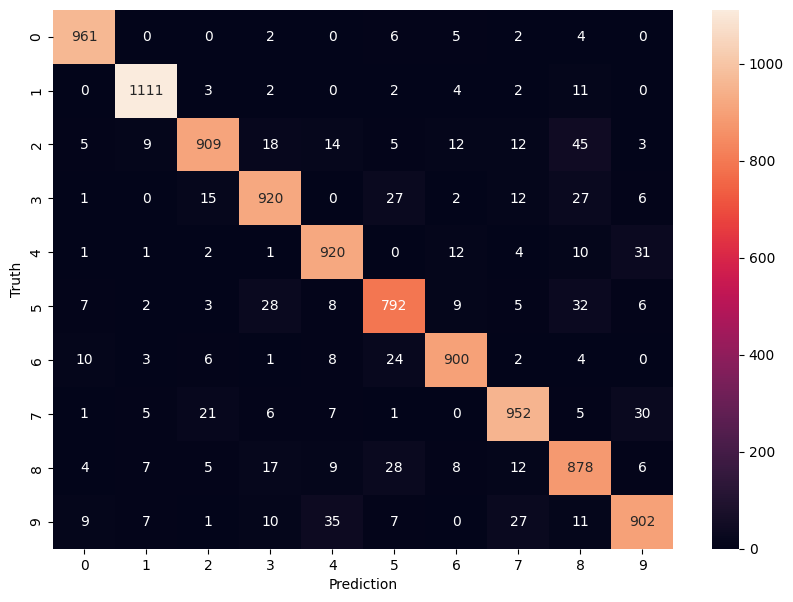

In [5]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [6]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.3019


[0.267314076423645, 0.9244999885559082]

Hidden Layer

In [7]:
# Import necessary libraries
import tensorflow as tf
import datetime

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0  # Normalize and flatten
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# Define a function to build the model
def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# Function to train the model with a specific optimizer
def train_model(optimizer, log_dir):
    model = build_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model.fit(
        x_train, y_train,
        epochs=2,
        validation_data=(x_test, y_test),
        callbacks=[tensorboard_callback]
    )

# Train with SGD optimizer
sgd_log_dir = "logs/sgd/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_model(tf.keras.optimizers.SGD(), sgd_log_dir)

# Train with Adam optimizer
adam_log_dir = "logs/adam/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_model(tf.keras.optimizers.Adam(), adam_log_dir)

# Load TensorBoard in Colab

# %load_ext tensorboard
# %tensorboard --logdir logs

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7295 - loss: 1.0319 - val_accuracy: 0.9069 - val_loss: 0.3507
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9023 - loss: 0.3504 - val_accuracy: 0.9199 - val_loss: 0.2903
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8797 - loss: 0.4250 - val_accuracy: 0.9592 - val_loss: 0.1373
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9655 - loss: 0.1203 - val_accuracy: 0.9710 - val_loss: 0.0982


# multiple optimizer

In [ ]:
import tensorflow as tf
import datetime
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0  # Normalize and flatten
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# Define the model structure
def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# List of optimizers to compare
optimizers = [
    ("SGD", tf.keras.optimizers.SGD()),
    ("RMSprop", tf.keras.optimizers.RMSprop()),
    ("Adam", tf.keras.optimizers.Adam()),
    ("AdamW", tf.keras.optimizers.AdamW()),
    ("Adadelta", tf.keras.optimizers.Adadelta()),
    ("Adagrad", tf.keras.optimizers.Adagrad()),
    ("Adamax", tf.keras.optimizers.Adamax()),
    ("Adafactor", tf.keras.optimizers.Adafactor()),  # Removed `scale_learning_rate`
    ("Nadam", tf.keras.optimizers.Nadam()),
    ("Ftrl", tf.keras.optimizers.Ftrl()),
]

# Train models with each optimizer and log results
for optimizer_name, optimizer in optimizers:
    print(f"Training with {optimizer_name} optimizer...")
    # Create a new model for each optimizer
    model = create_model()

    # Compile the model with the current optimizer
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Set up TensorBoard logging
    log_dir = f"logs/{optimizer_name}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Train the model
    model.fit(
        x_train, y_train,
        epochs=2,
        validation_data=(x_test, y_test),
        callbacks=[tensorboard_callback]
    )

# # Launch TensorBoard
# %load_ext tensorboard
# %tensorboard --logdir logs/